In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.linalg import solve_discrete_are

[[0.2334304  0.23342273]]


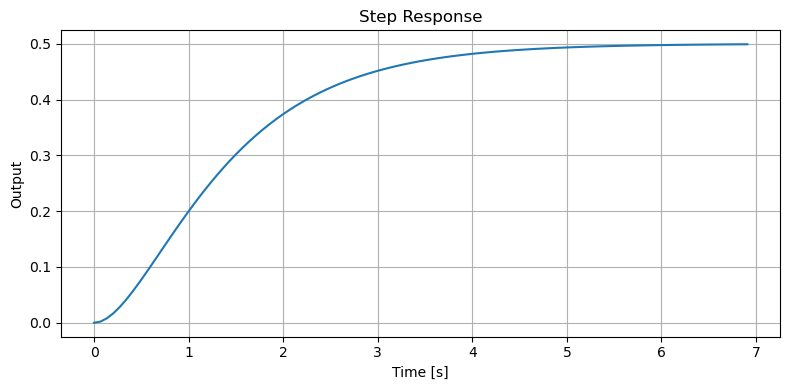

In [2]:
# Определим матрицы состояния (пример второго порядка)
dt = 0.01
A = np.array([[0, 1],
              [-2, -3]])
B = np.array([[0],
              [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Создание модели в пространстве состояний
sys = control.StateSpace(A, B, C, D)

# Построение переходной характеристики (step response)
time, response = control.step_response(sys)

# Convert to discrete time domain
sysd = control.c2d(sys, dt)
Ad = sysd.A
Bd = sysd.B

# solve lqr problem
Q = np.array([  [1, 0],
                [0, 1]])
R = np.array([1])
P = solve_discrete_are(Ad, Bd, Q, R)
K = np.linalg.inv(Bd.T @ P @ Bd + R) @ (Bd.T @ P @ Ad)
print(K)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(time, response)
plt.title("Step Response")
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.grid(True)
plt.tight_layout()
plt.show()